In [2]:
import medmnist
from medmnist import INFO, Evaluator
import numpy as np
from matplotlib import pyplot as plt


In [3]:
data = np.load("breastmnist.npz", allow_pickle=True)
lst = data.files
for item in lst:
    print(item)
    print(data[item])


train_images
[[[139 139 138 ... 165 162 165]
  [ 84  92  94 ... 124 116 112]
  [ 84  82  87 ... 124 127 126]
  ...
  [ 63  70  83 ...  36  34  32]
  [ 59  70  73 ...  50  40  34]
  [ 62  65  61 ...  51  42  40]]

 [[ 82  85  83 ...  76  83  86]
  [ 80  82  68 ...  59  61  64]
  [ 56  59  60 ...  59  58  60]
  ...
  [ 24  23  19 ...  18  18  17]
  [ 23  21  16 ...  24  23  19]
  [ 22  24  18 ...  26  22  19]]

 [[157 155 151 ... 130 128 131]
  [160 162 156 ... 126 126 135]
  [129 119 122 ... 114 110 110]
  ...
  [ 67  66  63 ...  77  75  71]
  [ 74  70  72 ...  80  82  76]
  [ 85  81  73 ...  77  79  72]]

 ...

 [[159 160 167 ... 134 136 143]
  [144 147 144 ... 123 128 143]
  [120 129 140 ... 119 101  99]
  ...
  [ 54  55  53 ...  52  44  40]
  [ 50  53  51 ...  43  46  51]
  [ 57  52  51 ...  50  55  56]]

 [[ 55  57  61 ...  59  62  64]
  [ 63  72  78 ...  68  70  71]
  [ 51  50  64 ...  61  50  57]
  ...
  [ 12  12  13 ...  19  19  19]
  [ 13  12  14 ...  17  18  18]
  [ 12  12  15 

In [4]:
lst

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [5]:
x_train, y_train = data["train_images"], data["train_labels"]
x_val, y_val = data["val_images"], data["val_labels"]
x_test, y_test = data["test_images"], data["test_labels"]


In [6]:
print(f"Tamanho do conjunto de treino: {len(x_train)}")
print(f"Tamanho do conjunto de validação: {len(x_val)}")
print(f"Tamanho do conjunto de teste: {len(x_test)}")

Tamanho do conjunto de treino: 546
Tamanho do conjunto de validação: 78
Tamanho do conjunto de teste: 156


Dimensões de uma imagem do dataset: (28, 28)


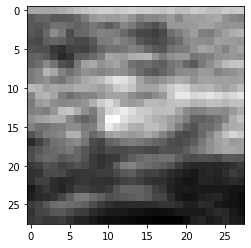

In [7]:
# Plotando um exemplo de imagem do conjunto de treino
plt.imshow(x_train[0], cmap="gray")
print(f"Dimensões de uma imagem do dataset: {x_train[0].shape}")

# Balanceamento do conjunto de treino

In [14]:
possible_classes = np.unique(y_train)
p_class = len(y_train[y_train == 1])
n_class = len(y_train[y_train == 0])

print(f"Possíveis {possible_classes}")
print(f"Classes positivas: {p_class} ({p_class/len(y_train) *100 } %)")
print(f"Classes negativas: {n_class} ({n_class/len(y_train) *100 } %)")
print("O dataset está DESBALANCEADO")

Possíveis [0 1]
Classes positivas: 399 (73.07692307692307 %)
Classes negativas: 147 (26.923076923076923 %)
O dataset está DESBALANCEADO
